# Part 1: Linear Interpolation 

### Simple linear interpolation approach

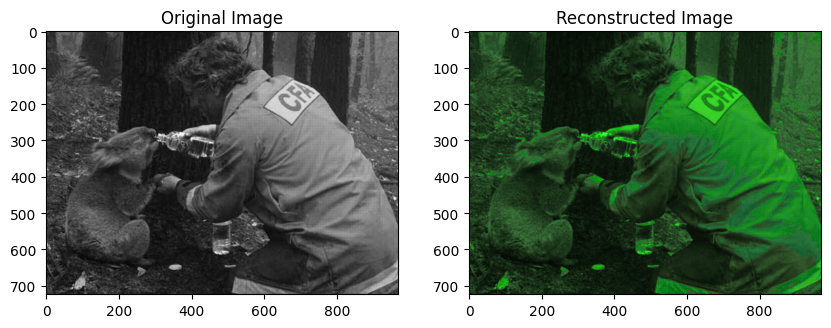

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def linear_interpolation_demosaicing(input_image):
    # Extract the individual color channels
    blue_channel = input_image[:, :, 0]
    green_channel = input_image[:, :, 1]
    red_channel = input_image[:, :, 2]

    # Reconstructed image with zeros
    reconstructed_image = np.zeros_like(input_image, dtype=np.float32)

    # Linear interpolation for green channel as green is more visible for human eye
    reconstructed_image[:, :, 1] = green_channel

    # Linear interpolation for blue channel
    reconstructed_image[1::2, 0::2, 0] = (blue_channel[:-1:2, 1::2] + blue_channel[1::2, 0::2]) / 2
    reconstructed_image[0::2, 1::2, 0] = (blue_channel[0::2, 0::2] + blue_channel[1::2, 1::2]) / 2

    # Linear interpolation for red channel
    reconstructed_image[0::2, 0::2, 2] = (red_channel[0::2, 1::2] + red_channel[1::2, 0::2]) / 2
    reconstructed_image[1::2, 1::2, 2] = (red_channel[:-1:2, 0::2] + red_channel[0::2, 1::2]) / 2

    # Convert the reconstructed image to uint8
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

    return reconstructed_image


input_image = cv2.imread('images/hope.bmp')


# Perform linear interpolation demosaicing
reconstructed_image = linear_interpolation_demosaicing(input_image)

# Display the original and reconstructed images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
plt.title('Reconstructed Image')

plt.show()


In [2]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
%matplotlib inline

### Reading the Mosaic Image

In [1]:
#Image directory and name
IMG_DIR = 'images/'
IMG_NAME = 'hope.bmp'

In [2]:
def read_image(img_name):
    img = mpimg.imread(img_name)
    return img

In [3]:
mosaic_img = read_image(IMG_DIR+IMG_NAME)
plt.imshow(mosaic_img, cmap="gray")
plt.axis("off")

NameError: name 'mpimg' is not defined

### Linear Interpolation

Get solution image

In [4]:
def get_solution_image(mosaic_img):
   
    h, w, _ = mosaic_img.shape
    soln_image = np.zeros_like(mosaic_img, dtype=float)
    
    for i in range(1, h-1):
        for j in range(1, w-1):
            if i % 2 == 1 and j % 2 == 1:
                # Red pixel (R), interpolate green and blue channels
                soln_image[i, j-1, 1] = np.mean(mosaic_img[i, j-1:j+2, 1])  # Green channel
                soln_image[i-1:i+2, j, 2] = np.mean(mosaic_img[i-1:i+2, j, 2])  # Blue channel
            elif i % 2 == 0 and j % 2 == 0:
                # Blue pixel (B), interpolate green and red channels
                soln_image[i, j+1, 1] = np.mean(mosaic_img[i, j:j+3, 1])  # Green channel
                soln_image[i-1:i+2, j, 0] = np.mean(mosaic_img[i-1:i+2, j, 0])  # Red channel
            else:
                # Green pixel (G), interpolate red and blue channels
                soln_image[i, j-1, 0] = np.mean(mosaic_img[i, j-1:j+2, 0])  # Red channel
                soln_image[i, j+1, 2] = np.mean(mosaic_img[i, j:j+3, 2])  # Blue channel

    return soln_image.astype(np.uint8)

Compute errors

In [5]:
def compute_errors(soln_image, original_image):
    # Ensure both images have the same shape
    if soln_image.shape != original_image.shape:
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Compute squared difference map for grayscale images
    squared_diff_map = (original_image.astype(float) - soln_image.astype(float)) ** 2
    
    # Display a plot of the squared difference values along a specific row (e.g., row 100)
    plt.plot(squared_diff_map[100, :])
    plt.title('Squared Differences along Row 100')
    plt.xlabel('Column Index')
    plt.ylabel('Squared Difference')
    plt.show()
    
    # Display squared differences map
    plt.imshow(squared_diff_map, cmap='hot')
    plt.title('Squared Differences Map')
    plt.show()
    
    # Compute average and maximum per-pixel errors
    average_error = np.mean(squared_diff_map)
    max_error = np.max(squared_diff_map)
    
    return average_error, max_error

Test image1

In [8]:
mosaic_img = read_image(IMG_DIR+'crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'crayons.jpg')

# You can see where it makes mistakes by computing a map of squared differences 
#(summed over the three color components) between the original and reconstructed color value for each pixel. 
#Compute such a map and display it using the skimage.io.imshow or cv2.imshow or matplotlib.pyplot.imshow .
#print(soln_image)

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(mosaic_img, cv2.COLOR_BGR2RGB), cmap="gray")
plt.title('Mosaic Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(soln_image, cv2.COLOR_BGR2RGB), cmap="gray")
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.plot(mosaic_img[100,:])

plt.subplot(2, 2, 4)
plt.plot(soln_image[100,:])

plt.show()

NameError: name 'mpimg' is not defined

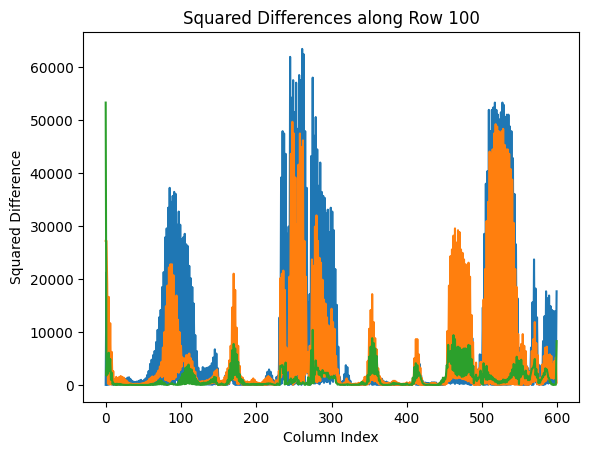

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


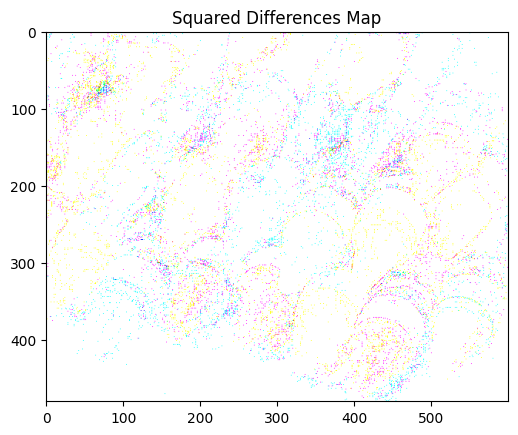

The average per-pixel error for crayons is: 5944.734515046296
The maximum per-pixel error for crayons is: 65025.0


In [8]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

Test image2

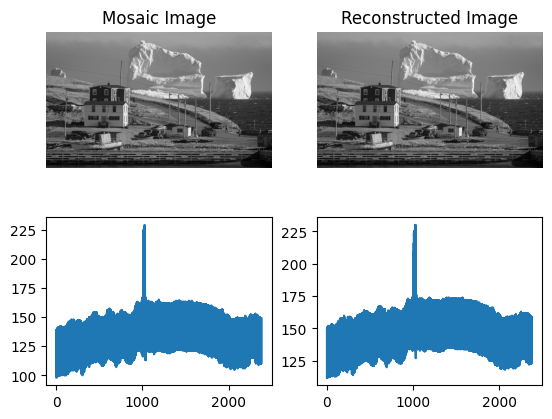

In [9]:
def get_solution_image(mosaic_img):
   
    h, w = mosaic_img.shape
    soln_image = mosaic_img.copy()
                
    for i in range(1, h-1):
        for j in range(1, w-1):
            if i % 2 == 1 and j % 2 == 1:
                # Red pixel (R), interpolate blue and green pixels
                soln_image[i, j-1] = np.mean(mosaic_img[i, j-1:j+2])  # Green pixel
                soln_image[i-1:i+2, j] = np.mean(mosaic_img[i-1:i+2, j])  # Blue pixel
            elif i % 2 == 0 and j % 2 == 0:
                # Blue pixel (B), interpolate red and green pixels
                soln_image[i, j+1] = np.mean(mosaic_img[i, j:j+3])  # Green pixel
                soln_image[i-1:i+2, j] = np.mean(mosaic_img[i-1:i+2, j])  # Red pixel
            else:
                # Green pixel (G), interpolate red and blue pixels
                soln_image[i, j-1] = np.mean(mosaic_img[i, j-1:j+2])  # Red pixel
                soln_image[i, j+1] = np.mean(mosaic_img[i, j:j+3])  # Blue pixel

    return soln_image.astype(np.uint8)

mosaic_img = read_image(IMG_DIR+'iceberg.bmp')

soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'iceberg.jpg')

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(mosaic_img, cv2.COLOR_BGR2RGB), cmap="gray")
plt.title('Mosaic Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(soln_image, cv2.COLOR_BGR2RGB), )
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.plot(mosaic_img[100,:])

plt.subplot(2, 2, 4)
plt.plot(soln_image[100,:])

plt.show()

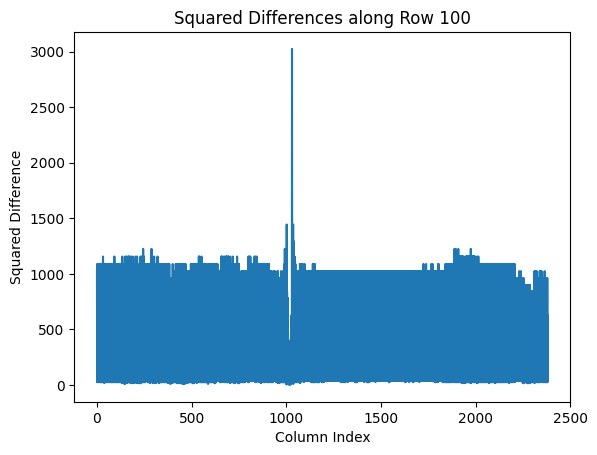

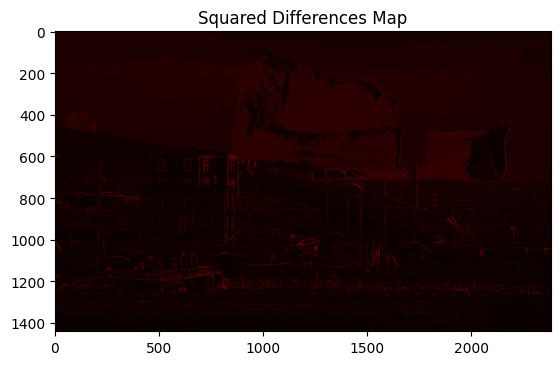

The average per-pixel error for crayons is: 371.6270996594832
The maximum per-pixel error for crayons is: 16900.0


In [10]:
def compute_errors(soln_image, original_image):
    # Ensure both images have the same shape
    if soln_image.shape != original_image.shape:
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Compute squared difference map for grayscale images
    squared_diff_map = (original_image.astype(float) - soln_image.astype(float)) ** 2
    
    # Display a plot of the squared difference values along a specific row (e.g., row 100)
    plt.plot(squared_diff_map[100, :])
    plt.title('Squared Differences along Row 100')
    plt.xlabel('Column Index')
    plt.ylabel('Squared Difference')
    plt.show()
    
    # Display squared differences map
    plt.imshow(squared_diff_map, cmap='hot')
    plt.title('Squared Differences Map')
    plt.show()
    
    # Compute average and maximum per-pixel errors
    average_error = np.mean(squared_diff_map)
    max_error = np.max(squared_diff_map)
    
    return average_error, max_error

pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

Test image3

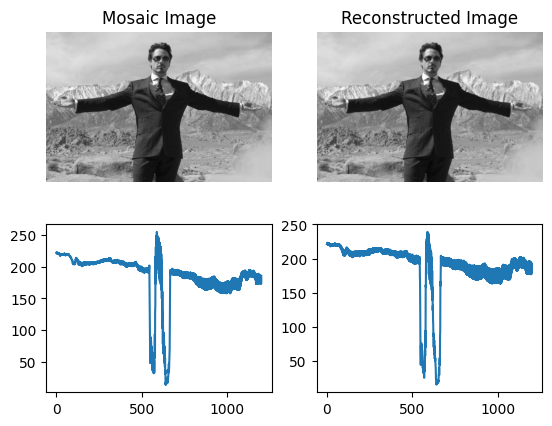

In [11]:
def get_solution_image(mosaic_img):
   
    h, w = mosaic_img.shape
    soln_image = mosaic_img.copy()
                
    for i in range(1, h-1):
        for j in range(1, w-1):
            if i % 2 == 1 and j % 2 == 1:
                # Red pixel (R), interpolate blue and green pixels
                soln_image[i, j-1] = np.mean(mosaic_img[i, j-1:j+2])  # Green pixel
                soln_image[i-1:i+2, j] = np.mean(mosaic_img[i-1:i+2, j])  # Blue pixel
            elif i % 2 == 0 and j % 2 == 0:
                # Blue pixel (B), interpolate red and green pixels
                soln_image[i, j+1] = np.mean(mosaic_img[i, j:j+3])  # Green pixel
                soln_image[i-1:i+2, j] = np.mean(mosaic_img[i-1:i+2, j])  # Red pixel
            else:
                # Green pixel (G), interpolate red and blue pixels
                soln_image[i, j-1] = np.mean(mosaic_img[i, j-1:j+2])  # Red pixel
                soln_image[i, j+1] = np.mean(mosaic_img[i, j:j+3])  # Blue pixel

    return soln_image.astype(np.uint8)

mosaic_img = read_image(IMG_DIR+'tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'tony.jpg')

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(mosaic_img, cv2.COLOR_BGR2RGB), cmap="gray")
plt.title('Mosaic Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(soln_image, cv2.COLOR_BGR2RGB), cmap="gray")
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.plot(mosaic_img[100,:])

plt.subplot(2, 2, 4)
plt.plot(soln_image[100,:])

plt.show()

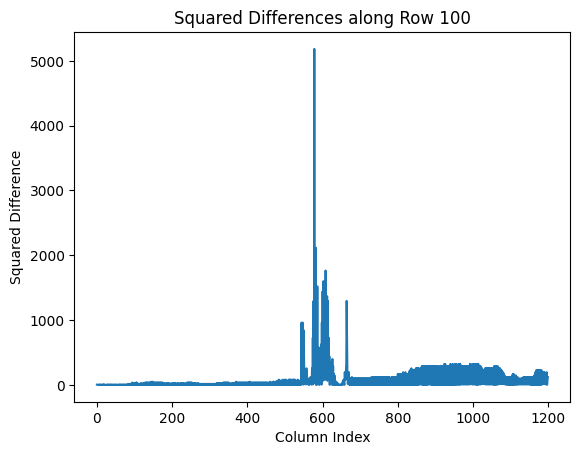

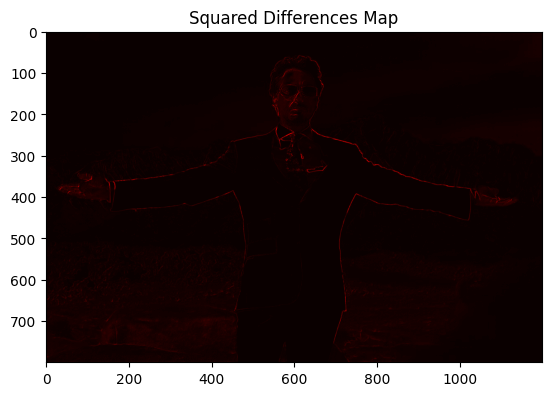

The average per-pixel error for crayons is: 108.46417395833333
The maximum per-pixel error for crayons is: 14400.0


In [12]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

Test image4

(724, 970)


(-0.5, 969.5, 723.5, -0.5)

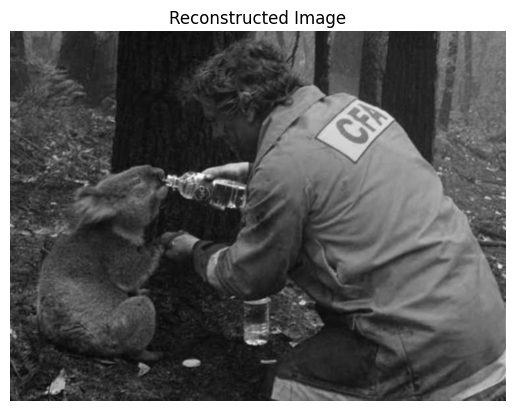

In [141]:
def get_solution_image(mosaic_img):
   
    h, w = mosaic_img.shape
    soln_image = mosaic_img.copy()
                
    for i in range(1, h-1):
        for j in range(1, w-1):
            if i % 2 == 1 and j % 2 == 1:
                # Red pixel (R), interpolate blue and green pixels
                soln_image[i, j-1] = np.mean(mosaic_img[i, j-1:j+2])  # Green pixel
                soln_image[i-1:i+2, j] = np.mean(mosaic_img[i-1:i+2, j])  # Blue pixel
            elif i % 2 == 0 and j % 2 == 0:
                # Blue pixel (B), interpolate red and green pixels
                soln_image[i, j+1] = np.mean(mosaic_img[i, j:j+3])  # Green pixel
                soln_image[i-1:i+2, j] = np.mean(mosaic_img[i-1:i+2, j])  # Red pixel
            else:
                # Green pixel (G), interpolate red and blue pixels
                soln_image[i, j-1] = np.mean(mosaic_img[i, j-1:j+2])  # Red pixel
                soln_image[i, j+1] = np.mean(mosaic_img[i, j:j+3])  # Blue pixel

    return soln_image.astype(np.uint8)

mosaic_img = read_image(IMG_DIR+'hope.bmp')
print(mosaic_img.shape)
soln_image = get_solution_image(mosaic_img)

plt.imshow(cv2.cvtColor(soln_image, cv2.COLOR_BGR2RGB), cmap="gray")
plt.title('Reconstructed Image')
plt.axis('off')

# Part 2: Freeman Method

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt2d

In [ ]:
def get_freeman_solution_image(img):
    # Create an empty image with the same shape as the input image
    solution_img = np.zeros_like(img, dtype=np.float32)
    
    # Separate the input image into its color channels
    b, g, r = cv2.split(img)
    
    # Apply linear interpolation to each channel
    b_interp = cv2.resize(b, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    g_interp = g
    r_interp = cv2.resize(r, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    
    # Compute the difference images between the interpolated channels and the G channel
    r_minus_g = r_interp - g_interp
    b_minus_g = b_interp - g_interp
    
    # Apply median filtering to the difference images
    r_minus_g_filtered = medfilt2d(r_minus_g, kernel_size=3)
    b_minus_g_filtered = medfilt2d(b_minus_g, kernel_size=3)
    
    # Create the modified R and B channels by adding the G channel to the respective difference images
    r_mod = g_interp + r_minus_g_filtered
    b_mod = g_interp + b_minus_g_filtered
    
    # Combine the modified channels into the solution image
    solution_img = cv2.merge([b_mod, g_interp, r_mod])
    
    return solution_img


# Load the input image
img = cv2.imread('input_image.jpg')

# Apply the Freeman method to demosaicing
solution_img = get_freeman_solution_image(img)

# Compute the errors
squared_diff, average_error, max_error = compute_errors(img, solution_img)

# Display the squared differences as an image
plt.imshow(squared_diff, cmap='hot')
plt.title('Squared Differences (Freeman Method)')
plt.colorbar()
plt.show()

# Print the average and maximum per-pixel errors
print(f'Average Error: {average_error}')
print(f'Maximum Error: {max_error}')

# Display a close-up of a patch where artifacts are apparent
patch = squared_diff[200:300, 200:300]
plt.imshow(patch, cmap='hot')
plt.title('Close-up of Patch with Artifacts (Freeman Method)')
plt.colorbar()
plt.show()


In [ ]:
# Part 3: Practice with image operations

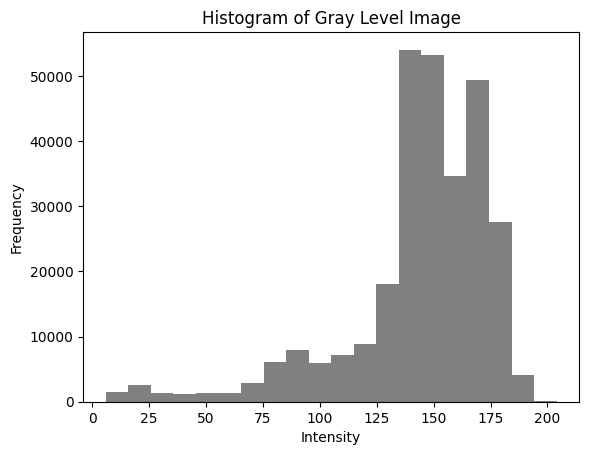

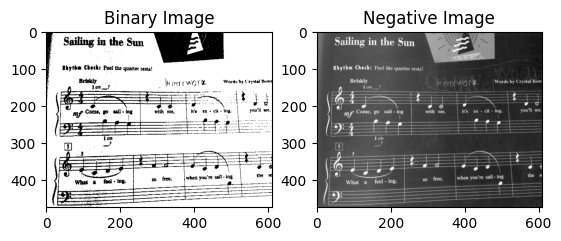

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('images/notes_color.jpg')

# Resize the image by a factor of 4
resized_image = cv2.resize(image, None, fx=0.25, fy=0.25)

# Create a new gray level image
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Display histogram of gray level image intensities with 20 bins
hist, bins = np.histogram(gray.flatten(), bins=20)
plt.hist(gray.flatten(), bins=20, color='gray')
plt.title('Histogram of Gray Level Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

# Binary image
threshold = 125
binary = np.where(gray > threshold, 255, 0)

# Negative of the gray level image
negative = 255 - gray

# Display the binary and negative images
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.subplot(1, 2, 2)
plt.imshow(negative, cmap='gray')
plt.title('Negative Image')
plt.show()
